In [1]:
import lzma
import pickle
import pandas as pd
import numpy as np
import os
import re

# Load the Excel file with map names
excel_path = 'D:/ML HEALTHCARE/CARDIO FINAL PROJECT/MapsInfo.xlsx'
maps_df = pd.read_excel(excel_path)

# Create a dictionary mapping patient date to map_name
patient_to_map = dict(zip(maps_df['Patient'], maps_df['AF']))

# Directory containing EGM files
egms_dir = 'D:/ML HEALTHCARE/CARDIO FINAL PROJECT/EGMS'

# List all available files
egm_files = [f for f in os.listdir(egms_dir) if f.endswith('_EGMs.xz')]
print("Available EGM files:\n")
for i, f in enumerate(egm_files):
    print(f"{i}: {f}")


Available EGM files:

0: Patient 2021_09_30_EGMs.xz
1: Patient 2021_10_04_EGMs.xz
2: Patient 2021_10_05_EGMs.xz
3: Patient 2021_10_18_EGMs.xz
4: Patient 2021_10_19_EGMs.xz
5: Patient 2021_11_02_EGMs.xz
6: Patient 2021_11_08_EGMs.xz
7: Patient 2021_11_10_EGMs.xz
8: Patient 2021_11_12_EGMs.xz
9: Patient 2021_11_15_EGMs.xz
10: Patient 2021_11_16_EGMs.xz
11: Patient 2021_11_17_EGMs.xz


In [2]:
# SELECT WHICH FILE TO LOAD (change the index 0-11)
file_index = 0

filename = egm_files[file_index]
print(f"Loading: {filename}")

# Extract patient date from filename
match = re.search(r'Patient (\d{4}_\d{2}_\d{2})_EGMs\.xz', filename)
patient_date = match.group(1)
map_name = patient_to_map.get(patient_date)
print(f"Patient date: {patient_date}")
print(f"Map name: {map_name}")

# Load the file
load_file_path = os.path.join(egms_dir, filename)
with lzma.open(load_file_path, 'rb') as f:
    file_content = pickle.load(f)

# Show what's in the file
print(f"\nFile content keys: {list(file_content.keys())}")

Loading: Patient 2021_09_30_EGMs.xz
Patient date: 2021_09_30
Map name: 2-AI FA BIP FINDER PRE ABL

File content keys: ['patient_id', 'map', 'point_indices', 'num_points', 'unipolar', 'bipolar', 'reference', 'electrode_positions', 'point_unipolar', 'point_bipolar', 'Subsample']


In [3]:
# Get the map index and bipolar EGMs
map_index = file_content['map'].tolist().index(map_name)
bipolar_EGMs = file_content['bipolar'][map_index]

print(f"Bipolar EGMs shape: {bipolar_EGMs.shape}")
print(f"  - Rows (time samples): {bipolar_EGMs.shape[0]}")
print(f"  - Columns (points): {bipolar_EGMs.shape[1]}")

Bipolar EGMs shape: (1250, 10875)
  - Rows (time samples): 1250
  - Columns (points): 10875


In [4]:
# Convert to DataFrame for Data Wrangler visualization
# Each column is a different measurement point, rows are time samples
egm_df = pd.DataFrame(
    bipolar_EGMs,
    columns=[f'Point_{i}' for i in range(bipolar_EGMs.shape[1])]
)

# Add time column (assuming 500Hz sampling rate = 2ms per sample)
egm_df.insert(0, 'Time_ms', np.arange(bipolar_EGMs.shape[0]) * 2)

print(f"DataFrame shape: {egm_df.shape}")
print(f"Columns: Time_ms + {bipolar_EGMs.shape[1]} points")

egm_df

DataFrame shape: (1250, 10876)
Columns: Time_ms + 10875 points


,Time_ms,Point_0,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,...,Point_10865,Point_10866,Point_10867,Point_10868,Point_10869,Point_10870,Point_10871,Point_10872,Point_10873,Point_10874
0,0,0.000,-0.003,0.009,0.012,0.012,0.003,0.003,-0.009,-0.003,...,0.000,0.000,0.045,0.000,0.000,0.060,0.237,-0.069,0.015,-0.129
1,2,-0.003,-0.006,0.009,0.015,0.003,0.003,0.000,-0.012,-0.006,...,-0.003,0.000,0.048,0.000,0.003,0.033,-0.018,-0.036,0.099,-0.114
2,4,-0.009,0.000,0.003,0.012,0.000,0.000,0.006,-0.009,-0.006,...,0.000,0.000,0.039,0.000,0.000,-0.078,-0.534,0.003,0.204,-0.201
3,6,0.000,0.000,0.009,0.006,0.006,0.000,0.000,-0.006,-0.003,...,0.000,0.000,0.027,0.000,0.000,0.162,0.177,0.024,0.198,-0.198
4,8,0.000,0.000,0.003,0.000,0.003,0.003,0.000,-0.006,-0.003,...,0.000,0.000,0.024,0.000,0.000,0.096,0.249,0.030,0.138,-0.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2490,0.003,-0.003,0.000,-0.006,-0.003,0.000,-0.003,0.003,-0.006,...,-0.036,0.081,-0.021,-0.012,0.003,-0.015,-0.003,0.003,-0.003,0.000
1246,2492,0.000,-0.003,-0.003,0.000,-0.003,-0.006,-0.003,0.000,-0.003,...,0.039,0.039,-0.003,0.015,-0.312,-0.003,-0.003,0.006,0.000,0.003
1247,2494,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.006,0.000,...,0.078,0.012,0.003,0.039,-1.206,0.000,0.000,0.000,0.000,0.000
1248,2496,0.000,0.000,-0.003,0.000,-0.003,0.000,0.000,0.003,0.000,...,0.111,-0.012,0.015,0.060,-0.387,0.003,0.000,0.000,0.000,0.003


Let's quickly visualizate some sample EGM signals to see what the waveform looks like, whether its noisy or periodic.

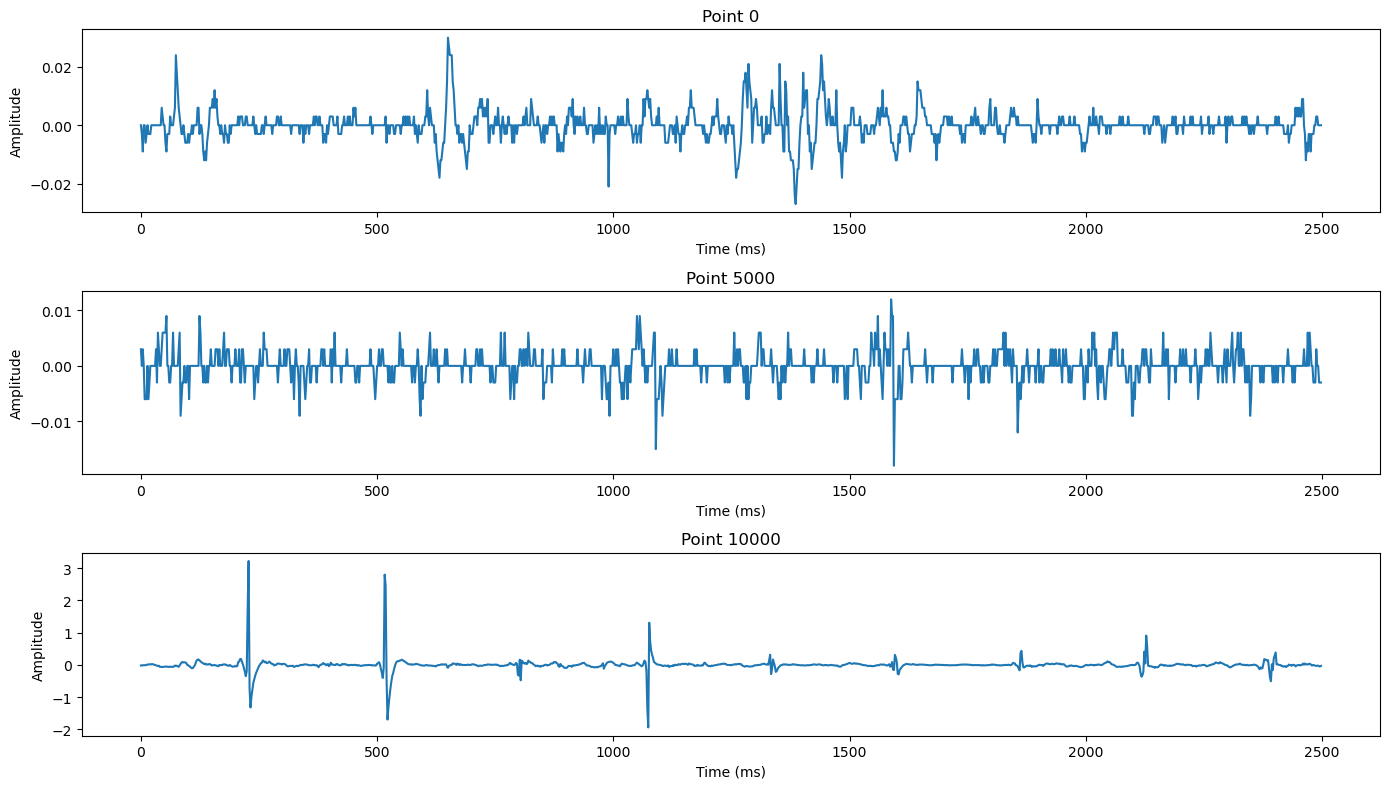

In [5]:
# Quick visualization example
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(14, 8))
for i, point_idx in enumerate([0, 5000, 10000]):
    axes[i].plot(egm_df['Time_ms'], bipolar_EGMs[:, point_idx])
    axes[i].set_title(f'Point {point_idx}')
    axes[i].set_xlabel('Time (ms)')
    axes[i].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

When we look at the plots for Point 0, 5000, etc., we are seeing one of three patterns:

- **Pattern A: Discrete, Organized Spikes**: There is a sharp spike, then a flat line (isoelectric line), then another spike. The timing between spikes might be irregular (because it is AFib), but the shape of the spike is consistent. This is likely healthy or passively activated tissue and our model will find this easy to predict (Low Error).

- **Pattern B: Complex Fractionated Atrial Electrograms (CFAEs)**: The signal looks "messy." There is no clear flat line; instead, there is continuous, low-amplitude jagged activity or multiple little spikes clustered together. This can represent fibrotic tissue and the model will struggle to predict the next step because the signal is chaotic (High Error).

- **Artifacts / Noise**: Electrical interference or a signal that wanders up and down like a snake (baseline drift). This is garbage data (poor electrode contact, breathing motion). We would need to apply a bandpass filter (usually 30–250 Hz) in the preprocessing step to avoid "learning just the noise."

Furthermore, there might be a **stationarity problem**:

Looking at the plot for **Point 0** across the full 5000+ ms:

- Does the pattern change?  
  *In AFib, a point might look organized for 2 seconds, then become fractionated for 3 seconds.*
- If the signal properties change rapidly, a static linear regression model will fail.

There are also **significant amplitude differences**:

- The Y-axis range varies between electrodes (e.g., one goes from -5 to +5, another only -0.1 to +0.1).
- Low voltage usually implies scar tissue (dead zones) or poor contact. High voltage implies healthy muscle.
- This confirms why **normalization** in our pipeline is mandatory. We must scale everything to  $\mu = 0,\, \sigma = 1$ so the neural network treats the patterns equally, regardless of voltage amplitude.

In [6]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# STANDARDIZATION

# We standardize each electrode signal independently to have mean=0 and std=1
# This prevents high-amplitude artifacts from dominating the loss function.

scaler = StandardScaler()
# StandardScaler fits on columns (electrodes) by default, each electrode gets its own mean and std
bipolar_normalized = scaler.fit_transform(bipolar_EGMs)

print(f"Original shape: {bipolar_EGMs.shape}")
print(f"Normalized shape: {bipolar_normalized.shape}")
print(f"Sample mean after normalization: {bipolar_normalized[:, 0].mean():.6f}")
print(f"Sample std after normalization: {bipolar_normalized[:, 0].std():.6f}")

# SEQUENCE/WINDOW CREATION

# For forecasting: use INPUT_LEN samples to predict the next OUTPUT_LEN samples
def create_sequences(data, input_len=1000, output_len=250):
    """
    Creates (Input, Target) pairs from time series data.
    
    For each electrode, extracts one window:
      - Input: first `input_len` time samples
      - Target: next `output_len` time samples
    
    Parameters:
    -----------
    data : np.ndarray, shape (n_time_steps, n_channels)
    input_len : int, number of input time steps
    output_len : int, number of output time steps to predict
    
    Returns:
    --------
    X : np.ndarray, shape (n_channels, input_len)
    y : np.ndarray, shape (n_channels, output_len)
    """
    n_time_steps, n_channels = data.shape
    total_len = input_len + output_len
    
    if n_time_steps < total_len:
        raise ValueError(f"Signal length ({n_time_steps}) is shorter than required window ({total_len})")
    
    X, y = [], []
    
    # Each electrode becomes one sample
    for i in range(n_channels):
        signal = data[:, i]
        X.append(signal[:input_len])
        y.append(signal[input_len:input_len + output_len])
    
    return np.array(X), np.array(y)

# Parameters
INPUT_LEN = 1000   # Use first 1000 samples (2 seconds at 500Hz)
OUTPUT_LEN = 250   # Predict next 250 samples (0.5 seconds)

print(f"\nCreating sequences with INPUT_LEN={INPUT_LEN}, OUTPUT_LEN={OUTPUT_LEN}...")
X, y = create_sequences(bipolar_normalized, INPUT_LEN, OUTPUT_LEN)

print(f"X shape: {X.shape}  (n_electrodes, input_length)")
print(f"y shape: {y.shape}  (n_electrodes, output_length)")

# TRAIN/VALIDATION/TEST SPLIT

# Split electrodes (samples) into train/val/test sets
# Using 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Val set:   {X_val.shape[0]} samples")
print(f"Test set:  {X_test.shape[0]} samples")

# CONVERT TO PYTORCH TENSORS

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Add feature dimension for RNN input: (batch, seq_len, features)
X_train_tensor = torch.FloatTensor(X_train).unsqueeze(-1).to(device)  # (N, 1000, 1)
y_train_tensor = torch.FloatTensor(y_train).to(device)                # (N, 250)

X_val_tensor = torch.FloatTensor(X_val).unsqueeze(-1).to(device)
y_val_tensor = torch.FloatTensor(y_val).to(device)

X_test_tensor = torch.FloatTensor(X_test).unsqueeze(-1).to(device)
y_test_tensor = torch.FloatTensor(y_test).to(device)

print(f"\nPyTorch tensor shapes:")
print(f"  X_train: {X_train_tensor.shape}")
print(f"  y_train: {y_train_tensor.shape}")
print(f"  X_val:   {X_val_tensor.shape}")
print(f"  X_test:  {X_test_tensor.shape}")

Original shape: (1250, 10875)
Normalized shape: (1250, 10875)
Sample mean after normalization: 0.000000
Sample std after normalization: 1.000000

Creating sequences with INPUT_LEN=1000, OUTPUT_LEN=250...
X shape: (10875, 1000)  (n_electrodes, input_length)
y shape: (10875, 250)  (n_electrodes, output_length)

Train set: 7612 samples
Val set:   1631 samples
Test set:  1632 samples
Using device: cuda

PyTorch tensor shapes:
  X_train: torch.Size([7612, 1000, 1])
  y_train: torch.Size([7612, 250])
  X_val:   torch.Size([1631, 1000, 1])
  X_test:  torch.Size([1632, 1000, 1])


## Baseline Models

Before training complex neural networks, we establish **baseline performance** to understand what "good" looks like. If our fancy model can't beat these simple baselines, something is wrong.

In [7]:
# BASELINE 1: NAIVE MODEL (Repeat Last Value)
# The simplest possible prediction: assume the signal stays at its last known value
# This is the absolute minimum bar to beat

def naive_baseline_predict(X):
    """Predict by repeating the last value of the input sequence."""
    last_values = X[:, -1]  # Shape: (n_samples,)
    predictions = np.repeat(last_values[:, np.newaxis], OUTPUT_LEN, axis=1)  # (n_samples, 250)
    return predictions

# Evaluate on test set
naive_predictions = naive_baseline_predict(X_test)

# Calculate metrics
naive_mse = np.mean((naive_predictions - y_test) ** 2)
naive_mae = np.mean(np.abs(naive_predictions - y_test))

print("=" * 50)
print("BASELINE 1: NAIVE MODEL (Repeat Last Value)")
print("=" * 50)
print(f"Test MSE: {naive_mse:.6f}")
print(f"Test MAE: {naive_mae:.6f}")
print(f"Test RMSE: {np.sqrt(naive_mse):.6f}")

BASELINE 1: NAIVE MODEL (Repeat Last Value)
Test MSE: 2.718462
Test MAE: 0.919747
Test RMSE: 1.648776


In [8]:
# BASELINE 2: LINEAR REGRESSION

# Fits a linear model: each output time step is a linear combination of all input time steps
# This captures simple linear trends but not complex patterns
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

# Use Ridge regression (L2 regularization) to prevent overfitting with many features
# MultiOutputRegressor handles predicting all 250 output steps at once
print("Training Linear Regression baseline...")

# Ridge with alpha regularization helps with the high-dimensional input
linear_model = Ridge(alpha=1.0)
multi_linear = MultiOutputRegressor(linear_model, n_jobs=-1)  # Use all CPU cores

# Fit on training data
multi_linear.fit(X_train, y_train)

# Predict on validation and test sets
linear_val_pred = multi_linear.predict(X_val)
linear_test_pred = multi_linear.predict(X_test)

# Calculate metrics
linear_val_mse = np.mean((linear_val_pred - y_val) ** 2)
linear_test_mse = np.mean((linear_test_pred - y_test) ** 2)
linear_test_mae = np.mean(np.abs(linear_test_pred - y_test))

print("\n" + "=" * 50)
print("BASELINE 2: LINEAR REGRESSION (Ridge)")
print("=" * 50)
print(f"Validation MSE: {linear_val_mse:.6f}")
print(f"Test MSE: {linear_test_mse:.6f}")
print(f"Test MAE: {linear_test_mae:.6f}")
print(f"Test RMSE: {np.sqrt(linear_test_mse):.6f}")

Training Linear Regression baseline...

BASELINE 2: LINEAR REGRESSION (Ridge)
Validation MSE: 1.129522
Test MSE: 1.147015
Test MAE: 0.574929
Test RMSE: 1.070988


In [9]:
# BASELINE COMPARISON SUMMARY

print("\n" + "=" * 60)
print("BASELINE MODEL COMPARISON")
print("=" * 60)
print(f"{'Model':<25} {'Test MSE':<15} {'Test MAE':<15} {'Test RMSE':<15}")
print("-" * 60)
print(f"{'Naive (Repeat Last)':<25} {naive_mse:<15.6f} {naive_mae:<15.6f} {np.sqrt(naive_mse):<15.6f}")
print(f"{'Linear Regression':<25} {linear_test_mse:<15.6f} {linear_test_mae:<15.6f} {np.sqrt(linear_test_mse):<15.6f}")
print("-" * 60)

# Calculate improvement
improvement = (naive_mse - linear_test_mse) / naive_mse * 100
print(f"\nLinear Regression improves over Naive by: {improvement:.1f}%")


BASELINE MODEL COMPARISON
Model                     Test MSE        Test MAE        Test RMSE      
------------------------------------------------------------
Naive (Repeat Last)       2.718462        0.919747        1.648776       
Linear Regression         1.147015        0.574929        1.070988       
------------------------------------------------------------

Linear Regression improves over Naive by: 57.8%


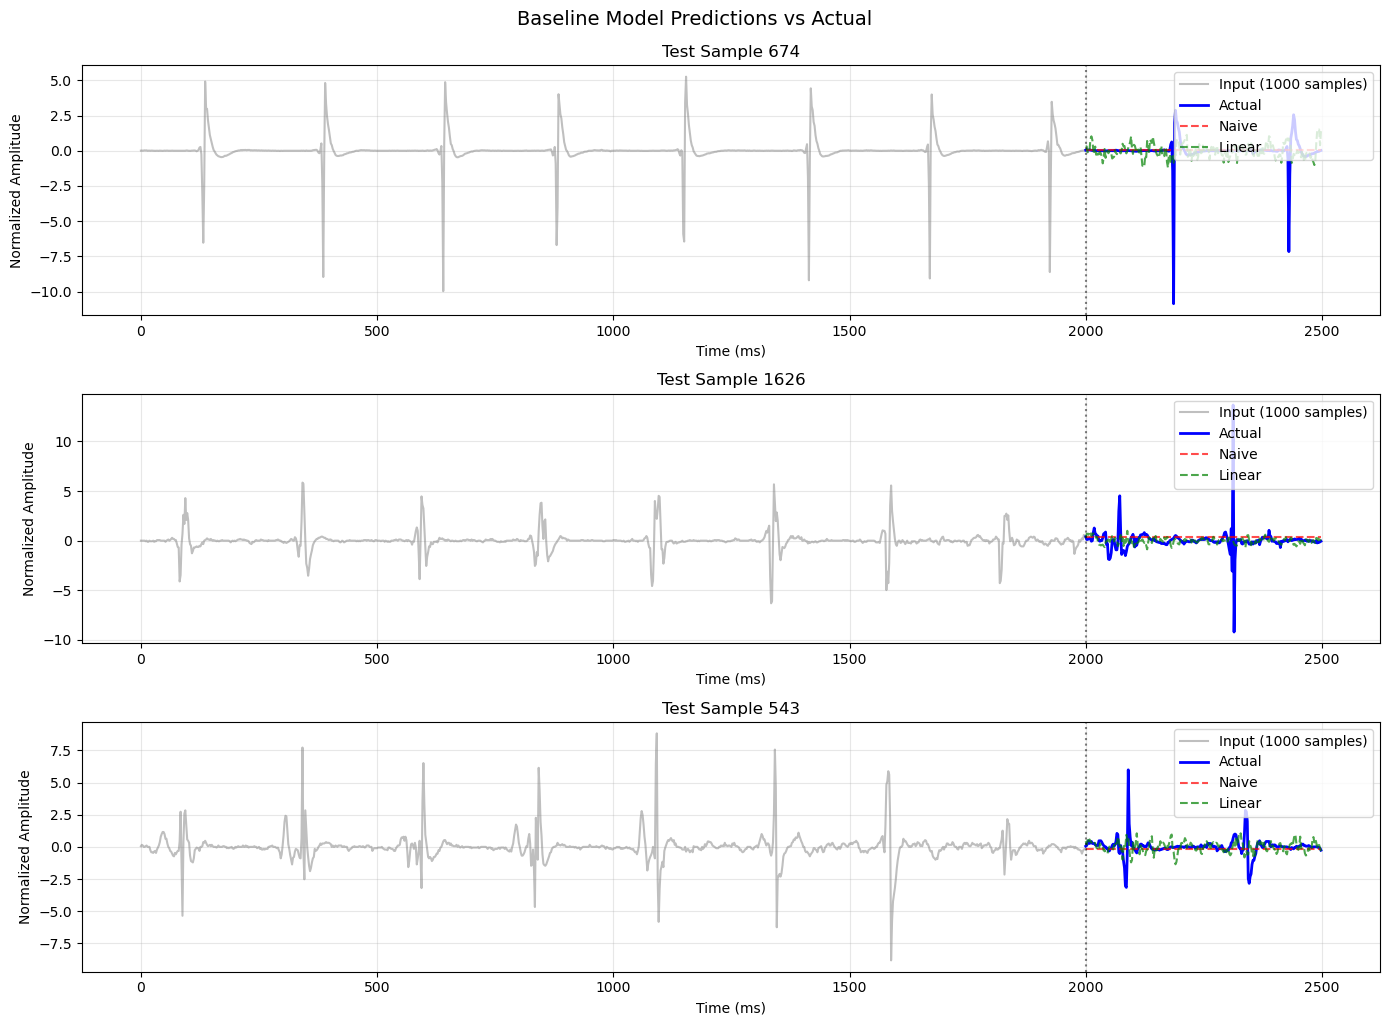

In [10]:
# VISUALIZE BASELINE PREDICTIONS

# Let's see how the baselines perform on a few sample electrodes
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Pick 3 random test samples to visualize
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 3, replace=False)

for idx, (ax, sample_idx) in enumerate(zip(axes, sample_indices)):
    # Get the full signal: input (1000) + actual target (250)
    input_signal = X_test[sample_idx]
    actual_target = y_test[sample_idx]
    
    # Predictions
    naive_pred = naive_predictions[sample_idx]
    linear_pred = linear_test_pred[sample_idx]
    
    # Time axes
    time_input = np.arange(INPUT_LEN) * 2  # ms
    time_target = np.arange(INPUT_LEN, INPUT_LEN + OUTPUT_LEN) * 2  # ms
    
    # Plot input signal (gray)
    ax.plot(time_input, input_signal, 'gray', alpha=0.5, label='Input (1000 samples)')
    
    # Plot actual target (blue)
    ax.plot(time_target, actual_target, 'b-', linewidth=2, label='Actual')
    
    # Plot predictions
    ax.plot(time_target, naive_pred, 'r--', linewidth=1.5, alpha=0.7, label='Naive')
    ax.plot(time_target, linear_pred, 'g--', linewidth=1.5, alpha=0.7, label='Linear')
    
    # Vertical line at prediction start
    ax.axvline(x=INPUT_LEN * 2, color='black', linestyle=':', alpha=0.5)
    
    ax.set_title(f'Test Sample {sample_idx}')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Normalized Amplitude')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Baseline Model Predictions vs Actual', y=1.02, fontsize=14)
plt.show()

In [11]:
# PHASE 4: DEEP LEARNING MODELS (GRU & LSTM)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import time
import gc

# Create DataLoaders
BATCH_SIZE = 64  

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

print(f"\nData ready. Input shape: {X_train_tensor.shape}, Target shape: {y_train_tensor.shape}")


Data ready. Input shape: torch.Size([7612, 1000, 1]), Target shape: torch.Size([7612, 250])


Let us define both of the deep NN models we will be using:

In [14]:
class GRUForecaster(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=250, num_layers=1):
        super(GRUForecaster, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # x shape: (batch, seq_len, features)
        out, _ = self.gru(x)
        # Take the output of the last time step
        last_step = out[:, -1, :]
        prediction = self.fc(last_step)
        return prediction

class LSTMForecaster(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=250, num_layers=1):
        super(LSTMForecaster, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        last_step = out[:, -1, :]
        prediction = self.fc(last_step)
        return prediction

# IMPROVED ARCHITECTURE: Seq2Seq with Attention

# This model can "look back" at relevant parts of the input 
# when predicting each output timestep, crucial for spike timing.
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)
    
    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: (batch, hidden)
        # encoder_outputs: (batch, seq_len, hidden)
        seq_len = encoder_outputs.size(1)
        
        # Repeat decoder hidden state for each encoder timestep
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, seq_len, 1)
        
        # Concatenate and compute attention scores
        energy = torch.tanh(self.attn(torch.cat([decoder_hidden, encoder_outputs], dim=2)))
        attention_scores = self.v(energy).squeeze(2)  # (batch, seq_len)
        
        return torch.softmax(attention_scores, dim=1)

class Seq2SeqAttentionForecaster(nn.Module):
    """
    Encoder-Decoder with Attention for time series forecasting.
    
    Key advantages over simple LSTM/GRU:
    1. Decoder generates one step at a time (better temporal resolution)
    2. Attention lets model focus on relevant input timesteps
    3. Skip connection adds last input values directly to output
    """
    def __init__(self, input_size=1, hidden_size=128, output_size=250, num_layers=2, dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        # Encoder
        self.encoder = nn.GRU(input_size, hidden_size, num_layers, 
                              batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
        # Attention
        self.attention = Attention(hidden_size)
        
        # Decoder
        self.decoder_cell = nn.GRUCell(hidden_size + input_size, hidden_size)
        
        # Output layers with skip connection
        self.fc_out = nn.Sequential(
            nn.Linear(hidden_size + hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 1)
        )
        
        # Learn to combine context with prediction
        self.context_combine = nn.Linear(hidden_size * 2, hidden_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        device = x.device
        
        # Encode input sequence
        encoder_outputs, encoder_hidden = self.encoder(x)
        # encoder_outputs: (batch, seq_len, hidden)
        # encoder_hidden: (num_layers, batch, hidden)
        
        # Initialize decoder hidden state from encoder
        decoder_hidden = encoder_hidden[-1]  # (batch, hidden)
        
        # Start with last input value
        decoder_input = x[:, -1, :]  # (batch, 1)
        
        # Generate predictions one step at a time
        predictions = []
        
        for t in range(self.output_size):
            # Compute attention weights
            attn_weights = self.attention(decoder_hidden, encoder_outputs)  # (batch, seq_len)
            
            # Compute context vector (weighted sum of encoder outputs)
            context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # (batch, hidden)
            
            # Decoder input: context + previous prediction
            decoder_input_combined = torch.cat([context, decoder_input], dim=1)
            
            # Update decoder hidden state
            decoder_hidden = self.decoder_cell(decoder_input_combined, decoder_hidden)
            
            # Combine context and hidden for output
            combined = torch.cat([decoder_hidden, context], dim=1)
            
            # Predict next value
            output = self.fc_out(combined)  # (batch, 1)
            predictions.append(output)
            
            # Use prediction as next input (autoregressive)
            decoder_input = output
        
        # Stack all predictions
        predictions = torch.cat(predictions, dim=1)  # (batch, output_size)
        return predictions

class TCNForecaster(nn.Module):
    """
    Temporal Convolutional Network are often better than RNNs for capturing local patterns.
    Uses dilated causal convolutions to capture both short and long-range dependencies.
    """
    def __init__(self, input_size=1, hidden_size=64, output_size=250, num_layers=4):
        super().__init__()
        self.output_size = output_size
        
        layers = []
        in_channels = input_size
        
        for i in range(num_layers):
            dilation = 2 ** i
            layers.append(nn.Conv1d(in_channels, hidden_size, kernel_size=3, 
                                   padding=dilation, dilation=dilation))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_size))
            in_channels = hidden_size
        
        self.conv_layers = nn.Sequential(*layers)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # x: (batch, seq_len, features) -> (batch, features, seq_len)
        x = x.permute(0, 2, 1)
        x = self.conv_layers(x)
        # Global average pooling + last timestep
        x = x[:, :, -1]  # Take last timestep
        return self.fc(x)

Currently, `criterion = nn.MSELoss()` treats a tiny error on a quiet day the same as a massive error during a spike. Because the spikes are rare, the model decides it's "cheaper" to ignore them than to try to predict them and get it wrong.

In [15]:
import torch
import torch.nn as nn

class WeightedSpikeLoss(nn.Module):
    def __init__(self, spike_weight=3.0, fixed_threshold=None):
        super().__init__()
        if fixed_threshold is None:
            raise ValueError("fixed_threshold must be provided")

        self.spike_weight = spike_weight
        self.fixed_threshold = fixed_threshold

    def forward(self, inputs, targets):
        square_loss = (inputs - targets) ** 2
        abs_error = torch.abs(inputs - targets)

        spike_mask = torch.abs(targets) > self.fixed_threshold

        loss = square_loss
        loss[spike_mask] = abs_error[spike_mask] * self.spike_weight

        return loss.mean()

# Precompute fixed threshold from training targets    
with torch.no_grad():
    all_train_targets = torch.cat(
        [y for _, y in train_loader],
        dim=0
    ).to(device)
    fixed_threshold = torch.quantile(torch.abs(all_train_targets), 0.95)

In [16]:
# TRAINING 
def train_model(model, train_loader, val_loader, criterion, model_name="Model", epochs=15, lr=3e-4):
    print(f"\nTraining {model_name}...")
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    history = {'train_loss': [], 'val_loss': []}
    best_val_loss = float('inf')
    start_time = time.time()
    
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        
        train_loss /= len(train_loader.dataset)
        
        # Validation Phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        
        # Save best model logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        
        # Print progress every few epochs
        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train MSE: {train_loss:.6f} | Val MSE: {val_loss:.6f}")
            
    print(f"{model_name} Training Complete. Best Val MSE: {best_val_loss:.6f}")
    print(f"Time taken: {time.time() - start_time:.1f}s")
    return history

In [17]:
# Clear GPU memory first
import gc
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    gc.collect()
    print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB allocated")

# Use smaller models to fit in memory, or fall back to CPU if needed
USE_SMALLER_MODELS = False 

if USE_SMALLER_MODELS:
    HIDDEN_SIZE = 64  # Reduced from 128
    NUM_LAYERS = 1    # Reduced from 2
else:
    HIDDEN_SIZE = 128
    NUM_LAYERS = 2

print(f"Using hidden_size={HIDDEN_SIZE}, num_layers={NUM_LAYERS}")

criterion = WeightedSpikeLoss(spike_weight=3.0, fixed_threshold=fixed_threshold)

# Initialize and train GRU first
gru_model = GRUForecaster(hidden_size=HIDDEN_SIZE, output_size=OUTPUT_LEN, num_layers=NUM_LAYERS).to(device)
print(f"GRU parameters: {sum(p.numel() for p in gru_model.parameters()):,}")
gru_history = train_model(gru_model, train_loader, val_loader, criterion, "GRU", epochs=30, lr=3e-4)

# Evaluate GRU before moving on (use DataLoader to avoid OOM)
gru_model.eval()
gru_predictions_list = []
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_test_tensor),
        batch_size=32,  # or 16 if still OOM
    )
    for (inputs,) in test_loader:
        outputs = gru_model(inputs)
        gru_predictions_list.append(outputs.cpu().numpy())
gru_predictions = np.concatenate(gru_predictions_list, axis=0)
gru_mse = np.mean((gru_predictions - y_test) ** 2)
print(f"GRU Test MSE: {gru_mse:.6f}")

GPU Memory: 0.06 GB allocated
Using hidden_size=128, num_layers=2
GRU parameters: 181,626

Training GRU...
Epoch 1/30 | Train MSE: 0.717391 | Val MSE: 0.712558
Epoch 5/30 | Train MSE: 0.707582 | Val MSE: 0.704199
Epoch 10/30 | Train MSE: 0.705688 | Val MSE: 0.702962
Epoch 15/30 | Train MSE: 0.704541 | Val MSE: 0.702313
Epoch 20/30 | Train MSE: 0.703588 | Val MSE: 0.701779
Epoch 25/30 | Train MSE: 0.702667 | Val MSE: 0.701892
Epoch 30/30 | Train MSE: 0.702033 | Val MSE: 0.701467
GRU Training Complete. Best Val MSE: 0.701388
Time taken: 82.1s
GRU Test MSE: 1.018674


In [18]:
lstm_model = LSTMForecaster(hidden_size=HIDDEN_SIZE, output_size=OUTPUT_LEN, num_layers=NUM_LAYERS).to(device)
print(f"LSTM parameters: {sum(p.numel() for p in lstm_model.parameters()):,}")
lstm_history = train_model(lstm_model, train_loader, val_loader, criterion, "LSTM", epochs=20, lr=3e-4)

# Evaluate LSTM
lstm_model.eval()
lstm_predictions_list = []
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_test_tensor),
        batch_size=64, 
    )
    for (inputs,) in test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions_list.append(outputs.cpu().numpy())
lstm_predictions = np.concatenate(lstm_predictions_list, axis=0)
lstm_mse = np.mean((lstm_predictions - y_test) ** 2)
print(f"LSTM Test MSE: {lstm_mse:.6f}")

# Seq2Seq with Attention
# Clear GPU memory before training Seq2Seq
del lstm_model
torch.cuda.empty_cache()
gc.collect()
print(f"\nGPU Memory after cleanup: {torch.cuda.memory_allocated()/1e9:.2f} GB")

# Use SMALLER batch size for Seq2Seq
SEQ2SEQ_BATCH_SIZE = 16  

seq2seq_train_loader = DataLoader(train_dataset, batch_size=SEQ2SEQ_BATCH_SIZE, shuffle=True)
seq2seq_val_loader = DataLoader(val_dataset, batch_size=SEQ2SEQ_BATCH_SIZE)

seq2seq_model = Seq2SeqAttentionForecaster(
        hidden_size=32,   
        output_size=OUTPUT_LEN, 
        num_layers=1,
        dropout=0.1
    ).to(device)

print(f"Seq2Seq parameters: {sum(p.numel() for p in seq2seq_model.parameters()):,}")
print("Note: Seq2Seq is slower because it generates 250 predictions sequentially (autoregressive)")

# Train with fewer epochs since it's slow
seq2seq_history = train_model(seq2seq_model, seq2seq_train_loader, seq2seq_val_loader, 
                               criterion, "Seq2Seq-Attention", epochs=10, lr=3e-4)
    
# Evaluate Seq2Seq
seq2seq_model.eval()
seq2seq_predictions_list = []
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_test_tensor),
        batch_size=16,  # Small batch for inference too
    )
    for (inputs,) in test_loader:
        outputs = seq2seq_model(inputs)
        seq2seq_predictions_list.append(outputs.cpu().numpy())
seq2seq_predictions = np.concatenate(seq2seq_predictions_list, axis=0)

# Calculate MSE
seq2seq_mse = np.mean((seq2seq_predictions - y_test) ** 2)
print(f"Seq2Seq Test MSE: {seq2seq_mse:.6f}")

LSTM parameters: 231,418

Training LSTM...
Epoch 1/20 | Train MSE: 0.718264 | Val MSE: 0.713343
Epoch 5/20 | Train MSE: 0.707558 | Val MSE: 0.704565
Epoch 10/20 | Train MSE: 0.705594 | Val MSE: 0.702873
Epoch 15/20 | Train MSE: 0.704412 | Val MSE: 0.702261
Epoch 20/20 | Train MSE: 0.703184 | Val MSE: 0.702042
LSTM Training Complete. Best Val MSE: 0.701885
Time taken: 84.2s
LSTM Test MSE: 1.019497

GPU Memory after cleanup: 0.08 GB
Seq2Seq parameters: 16,097
Note: Seq2Seq is slower because it generates 250 predictions sequentially (autoregressive)

Training Seq2Seq-Attention...
Epoch 1/10 | Train MSE: 0.718493 | Val MSE: 0.713313
Epoch 5/10 | Train MSE: 0.707636 | Val MSE: 0.703977
Epoch 10/10 | Train MSE: 0.705614 | Val MSE: 0.704192
Seq2Seq-Attention Training Complete. Best Val MSE: 0.702351
Time taken: 2481.7s
Seq2Seq Test MSE: 1.021853


In [19]:
# Final Results (predictions already computed above)
def spike_metrics(predictions, targets, threshold_percentile=95):
    """Compute metrics specifically on spike regions."""
    threshold = np.percentile(np.abs(targets), threshold_percentile)
    spike_mask = np.abs(targets) > threshold
    
    if spike_mask.sum() == 0:
        return np.nan, np.nan
    
    spike_mse = np.mean((predictions[spike_mask] - targets[spike_mask]) ** 2)
    spike_mae = np.mean(np.abs(predictions[spike_mask] - targets[spike_mask]))
    return spike_mse, spike_mae

gru_spike_mse, gru_spike_mae = spike_metrics(gru_predictions, y_test)
lstm_spike_mse, lstm_spike_mae = spike_metrics(lstm_predictions, y_test)
linear_spike_mse, linear_spike_mae = spike_metrics(linear_test_pred, y_test)

print("\n" + "=" * 70)
print("FINAL RESULTS COMPARISON")
print("=" * 70)
print(f"{'Model':<25} {'Overall MSE':<15} {'Spike MSE':<15} {'Spike MAE':<15}")
print("-" * 70)
print(f"{'Naive Baseline':<25} {naive_mse:<15.6f} {'N/A':<15} {'N/A':<15}")
print(f"{'Linear Regression':<25} {linear_test_mse:<15.6f} {linear_spike_mse:<15.4f} {linear_spike_mae:<15.4f}")
print(f"{'GRU':<25} {gru_mse:<15.6f} {gru_spike_mse:<15.4f} {gru_spike_mae:<15.4f}")
print(f"{'LSTM':<25} {lstm_mse:<15.6f} {lstm_spike_mse:<15.4f} {lstm_spike_mae:<15.4f}")

if seq2seq_predictions is not None:
    seq2seq_spike_mse, seq2seq_spike_mae = spike_metrics(seq2seq_predictions, y_test)
    print(f"{'Seq2Seq-Attention':<25} {seq2seq_mse:<15.6f} {seq2seq_spike_mse:<15.4f} {seq2seq_spike_mae:<15.4f}")
print("=" * 70)


FINAL RESULTS COMPARISON
Model                     Overall MSE     Spike MSE       Spike MAE      
----------------------------------------------------------------------
Naive Baseline            2.718462        N/A             N/A            
Linear Regression         1.147015        16.5326         3.4362         
GRU                       1.018674        16.6926         3.4713         
LSTM                      1.019497        16.7000         3.4720         
Seq2Seq-Attention         1.021853        16.7721         3.4939         


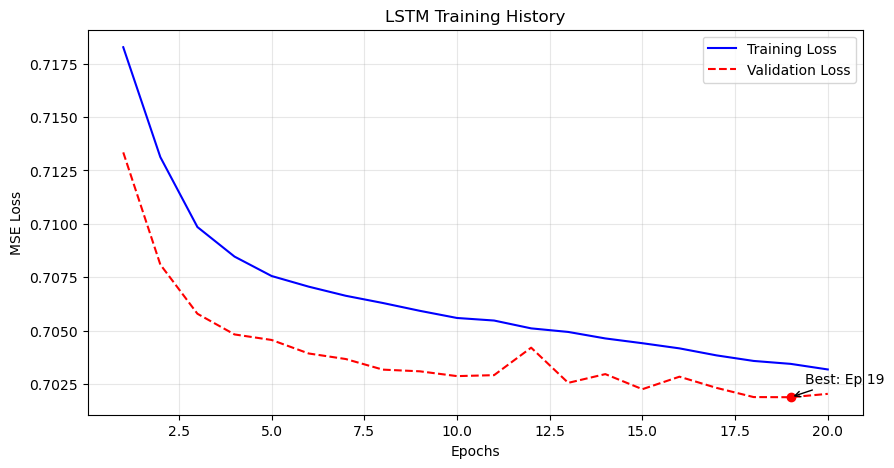

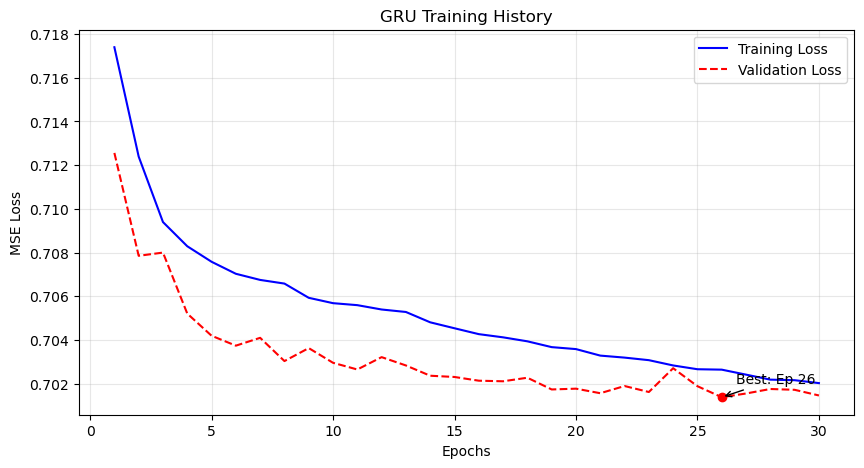

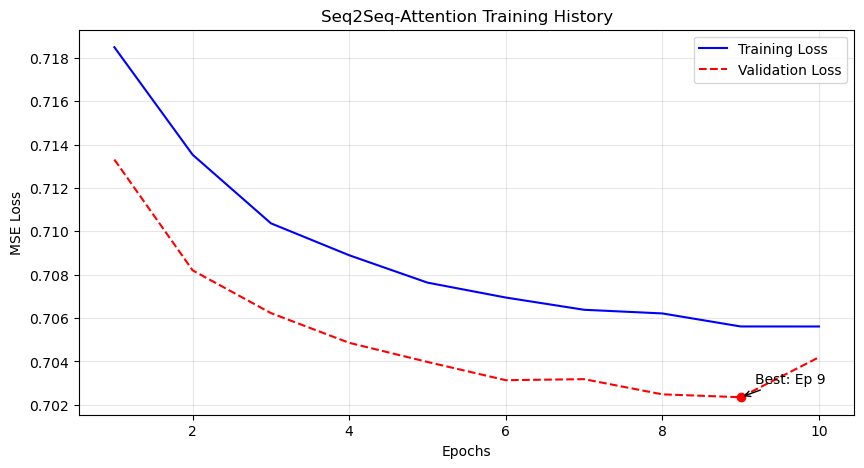

In [20]:
def plot_history(history, model_name="Model"):
    """
    Plots training and validation loss from the history dictionary.
    """
    epochs = range(1, len(history['train_loss']) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r--', label='Validation Loss')
    
    plt.title(f'{model_name} Training History')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Highlight the best validation epoch
    min_val_loss = min(history['val_loss'])
    best_epoch = history['val_loss'].index(min_val_loss) + 1
    plt.plot(best_epoch, min_val_loss, 'ro', label=f'Best Val ({min_val_loss:.4f})')
    plt.annotate(f'Best: Ep {best_epoch}', 
                 (best_epoch, min_val_loss), 
                 xytext=(10, 10), textcoords='offset points', 
                 arrowprops=dict(arrowstyle='->'))
    
    plt.show()

# Plot them
plot_history(lstm_history, "LSTM")
plot_history(gru_history, "GRU")
plot_history(seq2seq_history, "Seq2Seq-Attention")

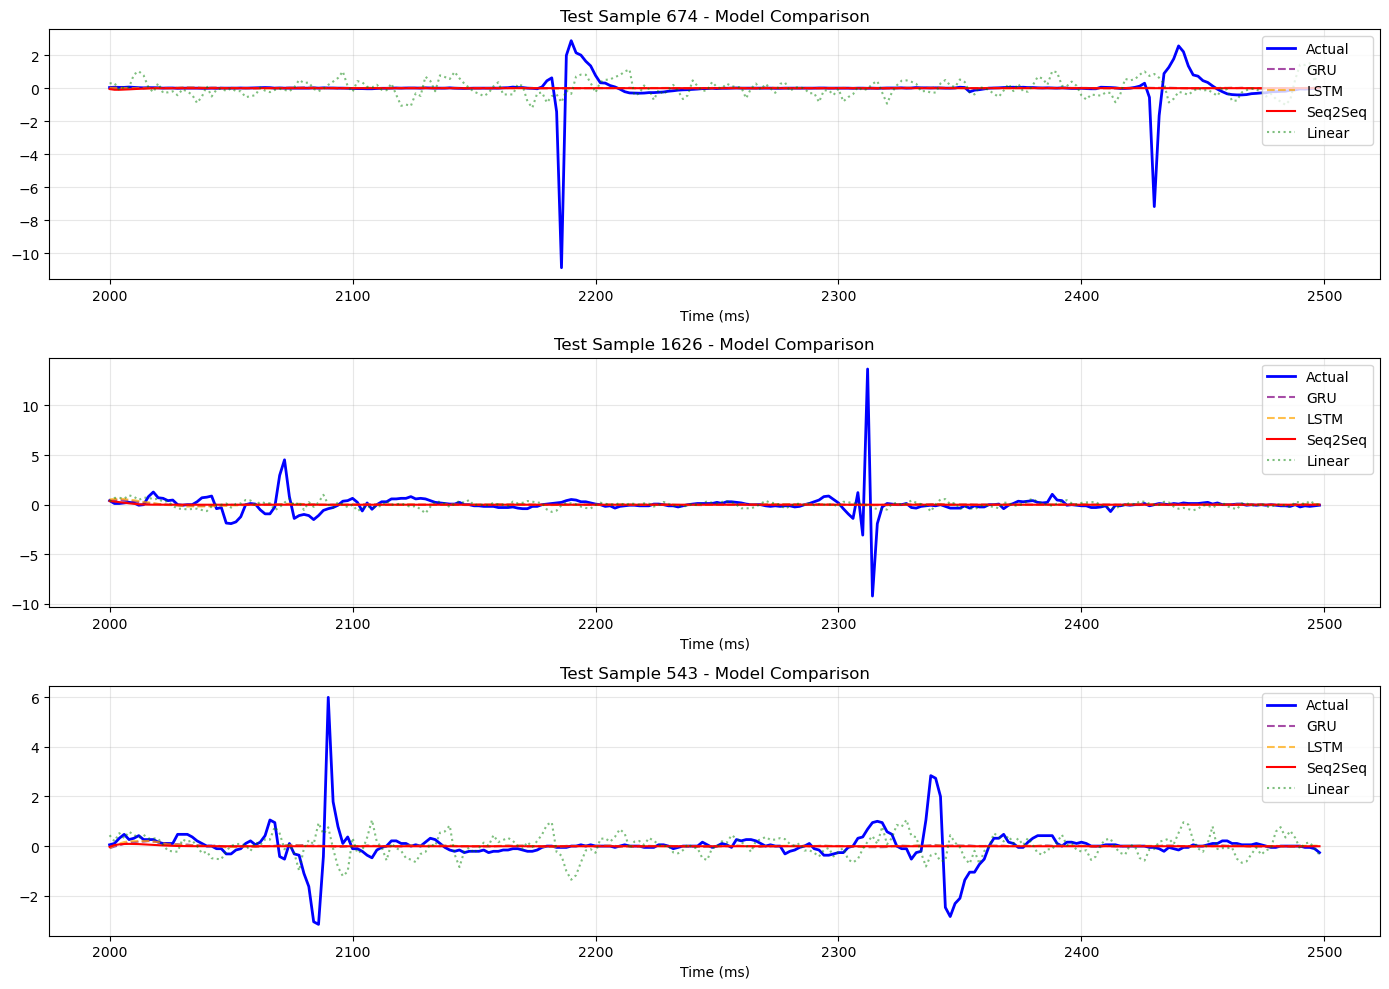

In [21]:
# Visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

if 'sample_indices' not in locals(): 
    sample_indices = np.random.choice(len(X_test), 3, replace=False)

for idx, (ax, sample_idx) in enumerate(zip(axes, sample_indices)):
    time_target = np.arange(INPUT_LEN, INPUT_LEN + OUTPUT_LEN) * 2
    
    ax.plot(time_target, y_test[sample_idx], 'b-', linewidth=2, label='Actual')
    ax.plot(time_target, gru_predictions[sample_idx], 'purple', linestyle='--', alpha=0.7, label='GRU')
    ax.plot(time_target, lstm_predictions[sample_idx], 'orange', linestyle='--', alpha=0.7, label='LSTM')
    
    if seq2seq_predictions is not None:
        ax.plot(time_target, seq2seq_predictions[sample_idx], 'red', linestyle='-', linewidth=1.5, label='Seq2Seq')
    
    ax.plot(time_target, linear_test_pred[sample_idx], 'g:', alpha=0.5, label='Linear')

    ax.set_title(f'Test Sample {sample_idx} - Model Comparison')
    ax.set_xlabel('Time (ms)')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()